<a href="https://colab.research.google.com/github/wimero72/challenge1-data-science-latam/blob/main/Challege1_data_science_latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de datos
### importamos las librerias Pandas para manipular los datos de los archivos CSV y Mathplotlib.pyplot para las graficas

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np # Para algunas operaciones si son necesarias

# --- Carga de Datos ---
try:
    url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
    url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
    url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
    url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
    # Leemos los archivo CSV en los DataFrame tienda1, tienda2, tienda3, tienda4
    tienda1 = pd.read_csv(url1)
    tienda2 = pd.read_csv(url2)
    tienda3 = pd.read_csv(url3)
    tienda4 = pd.read_csv(url4)

    # Agregar el ID correspondiente a cada tienda
    tienda1["Tienda_id"] = 1
    tienda2["Tienda_id"] = 2
    tienda3["Tienda_id"] = 3
    tienda4["Tienda_id"] = 4

    # Unir todos los DataFrames en uno solo
    df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

    # Guardar el DataFrame unificado si es necesario
    df.to_csv("datos_unificados.csv", index=False)

    # Obtén el número de filas y columnas
    filas, columnas = tiendas.shape

    # Imprime los resultados
    print("Número de filas:", filas)
    print("Número de columnas:", columnas)
    print("Archivo CSV cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: El archivo '{tienda1.csv}' no fue encontrado.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al leer el archivo CSV: {e}")
    exit()
df.head(10)

Número de filas: 9435
Número de columnas: 13
Archivo CSV cargado exitosamente.


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda_id
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,1
5,Bloques de construcción,Juguetes,24200.0,0.0,03/12/2020,Beatriz Morales,Cali,5,Cupón,1,3.43722,-76.52250,1
6,Muñeca bebé,Juguetes,44200.0,0.0,07/08/2021,Juan Fernandez,Bogotá,3,Nequi,1,4.60971,-74.08175,1
7,Lavavajillas,Electrodomésticos,1189700.0,63700.0,18/06/2021,Felipe Santos,Santa Marta,5,Tarjeta de crédito,10,11.24079,-74.19904,1
8,Lavadora de ropa,Electrodomésticos,1518200.0,79000.0,08/01/2022,Izabela de León,Bogotá,1,Tarjeta de crédito,5,4.60971,-74.08175,1
9,Carrito de control remoto,Juguetes,75200.0,5100.0,24/02/2020,Beatriz Morales,Bogotá,5,Nequi,1,4.60971,-74.08175,1


#1. Análisis de facturación




--- INICIO DE ANÁLISIS ---

--- 1. Total de Ventas por Tienda ---
Ventas por tienda (ordenadas):
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


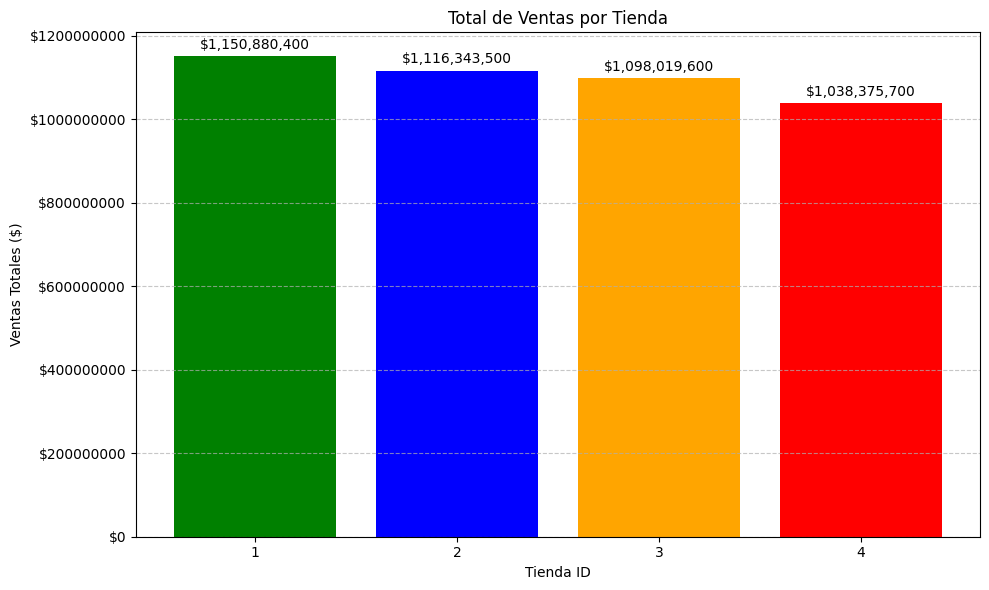

In [49]:
# --- Verificación de Columnas Esenciales ---
# nombre_archivo_csv = 'tienda_1.csv' # Asegúrate que este sea el nombre de tu archivo
col_producto = 'Producto'
col_categoria = 'Categoría del Producto'
col_precio = 'Precio'
col_envios = 'Costo de envío'
col_Fecha_Compra = 'Fecha de Compra'
col_vendedor = 'Vendedor'
col_calificacion = 'Calificación'
col_metodo_pago = 'Método de Pago'
col_tienda_id = 'Tienda_id' # Corregido a 'Tienda_id' según tu descripción
moneda_simbolo = '$'

# columnas_requeridas = [col_producto, col_categoria, col_precio, col_envios, col_calificacion, col_tienda_id]
# faltantes = [col for col in columnas_requeridas if col not in df.columns]
# if faltantes:
#     print(f"Error: Faltan las siguientes columnas en el CSV: {', '.join(faltantes)}")
#     exit()

print("\n--- INICIO DE ANÁLISIS ---")

# --- 1. Total de ventas de cada tienda (Gráfico de Barras con colores específicos) ---
print("\n--- 1. Total de Ventas por Tienda ---")
ventas_por_tienda = df.groupby(col_tienda_id)[col_precio].sum().sort_values(ascending=False)

print("Ventas por tienda (ordenadas):")
for tienda, total in ventas_por_tienda.items():
    print(f"Tienda {tienda}: {moneda_simbolo}{total:,.2f}")

# Colores: verde (más ventas), azul, naranja, rojo (menos ventas)
colores_base = ['green', 'blue', 'orange', 'red']
num_tiendas = len(ventas_por_tienda)
colores_graficos = []

if num_tiendas > 0: colores_graficos.append(colores_base[0])
if num_tiendas > 1: colores_graficos.append(colores_base[1])
if num_tiendas > 2: colores_graficos.append(colores_base[2])
if num_tiendas > 3: colores_graficos.append(colores_base[3])
# Si hay más de 4 tiendas, las siguientes no tendrán color específico de esta lista
# Se puede extender con 'grey' o dejar que matplotlib elija
if num_tiendas > 4:
    colores_graficos.extend(['grey'] * (num_tiendas - 4))
elif num_tiendas < 4 :
    colores_graficos = colores_base[:num_tiendas]


plt.figure(figsize=(10, 6))
bars_ventas = plt.bar(ventas_por_tienda.index.astype(str), ventas_por_tienda.values,
                      color=colores_graficos[:num_tiendas]) # Asegurar que coincidan barras y colores
plt.title('Total de Ventas por Tienda')
plt.xlabel('Tienda ID')
plt.ylabel(f'Ventas Totales ({moneda_simbolo})')
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter(f'{moneda_simbolo}%.0f'))
for bar in bars_ventas:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + (0.01 * ventas_por_tienda.values.max()),
             f'{moneda_simbolo}{yval:,.0f}', ha='center', va='bottom')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [2]:
ventas_por_tienda = tiendas.groupby("Tienda_id")["Precio"].sum()
print("Facturacion por Tienda Totales")
for tienda, valor in ventas_por_tienda.items():
    print(f"Tienda {tienda}: ${valor:,.0f}")

Facturacion por Tienda Totales
Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


# 2. Ventas por categoría


--- 2. Total de Ventas por Categoría por Tienda ---
Categoría del Producto Artículos para el hogar Deportes y diversión  \
Tienda_id                                                             
1                               $12,698,400.00       $39,290,000.00   
2                               $14,746,900.00       $34,744,500.00   
3                               $15,060,000.00       $35,593,100.00   
4                               $15,074,500.00       $33,350,100.00   

Categoría del Producto Electrodomésticos     Electrónicos  \
Tienda_id                                                   
1                        $363,685,200.00  $429,493,500.00   
2                        $348,567,800.00  $410,831,100.00   
3                        $329,237,900.00  $410,775,800.00   
4                        $283,260,200.00  $409,476,100.00   

Categoría del Producto Instrumentos musicales        Juguetes          Libros  \
Tienda_id                                                               

<ipython-input-77-2bd285a09299>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(ventas_categoria_tienda.applymap(lambda x: f"{moneda_simbolo}{x:,.2f}"))


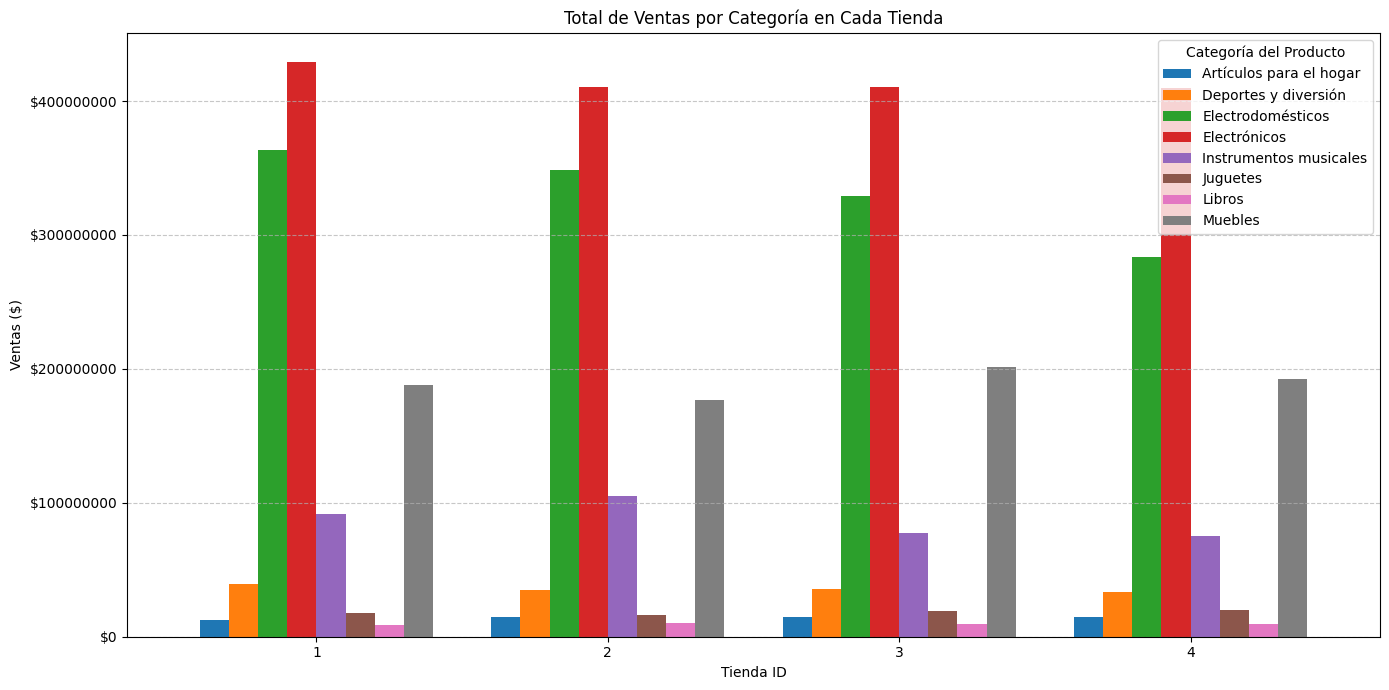

In [77]:
# --- 2. Total de ventas por categoría de productos de cada tienda ---
print("\n--- 2. Total de Ventas por Categoría por Tienda ---")
ventas_categoria_tienda = df.groupby([col_tienda_id, col_categoria])[col_precio].sum().sort_values(ascending=True).unstack(fill_value=1)
print(ventas_categoria_tienda.applymap(lambda x: f"{moneda_simbolo}{x:,.2f}"))

# Gráfico de barras agrupadas.
if not ventas_categoria_tienda.empty:
    ventas_categoria_tienda.plot(kind='bar', figsize=(14, 7), width=0.8)
    plt.title('Total de Ventas por Categoría en Cada Tienda')
    plt.xlabel('Tienda ID')
    plt.ylabel(f'Ventas ({moneda_simbolo})')
    plt.xticks(rotation=0)
    plt.legend(title=col_categoria)
    plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter(f'{moneda_simbolo}%.0f'))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos suficientes para graficar ventas por categoría por tienda.")


# 3. Calificación promedio de la tienda



--- 3. Calificación Promedio por Tienda ---
Tienda_id
3    4.05
2    4.04
4    4.00
1    3.98
Name: Calificación, dtype: float64


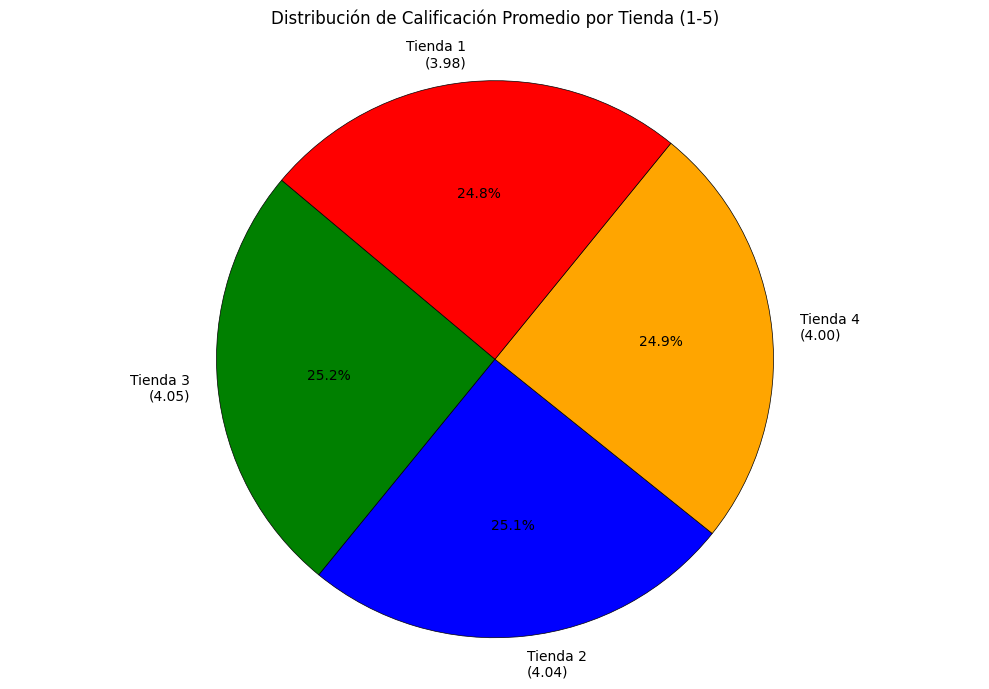

In [43]:
# --- 3. Calificación promedio de cada tienda (Gráfico de Torta) ---
print("\n--- 3. Calificación Promedio por Tienda ---")
calificacion_promedio_tienda = df.groupby(col_tienda_id)[col_calificacion].mean().sort_values(ascending=False)
print(calificacion_promedio_tienda.round(2))

if not calificacion_promedio_tienda.empty:
    plt.figure(figsize=(10, 7))
    # Usar los mismos colores que para las ventas, si hay suficientes tiendas, o colores por defecto
    colores_pie_calif = colores_grafico_ventas[:len(calificacion_promedio_tienda)] if len(calificacion_promedio_tienda) <= len(colores_grafico_ventas) else None

    plt.pie(calificacion_promedio_tienda,
            labels=[f"Tienda {idx}\n({val:.2f})" for idx, val in calificacion_promedio_tienda.items()],
            autopct='%1.1f%%', startangle=140,
            colors=colores_pie_calif,
            wedgeprops={"edgecolor":"black", 'linewidth': 0.5}) # Añadir borde a las porciones
    plt.title('Distribución de Calificación Promedio por Tienda (1-5)\n')
    plt.axis('equal') # Para que el pie sea un círculo
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos suficientes para graficar calificación promedio por tienda.")


# 4. Productos más y menos vendidos


--- 5. Producto Más y Menos Vendido (Cantidad) - Todas las Tiendas ---
Global - Más vendido: Mesa de noche (Cantidad: 210)
Global - Menos vendido: Celular ABXY (Cantidad: 157)


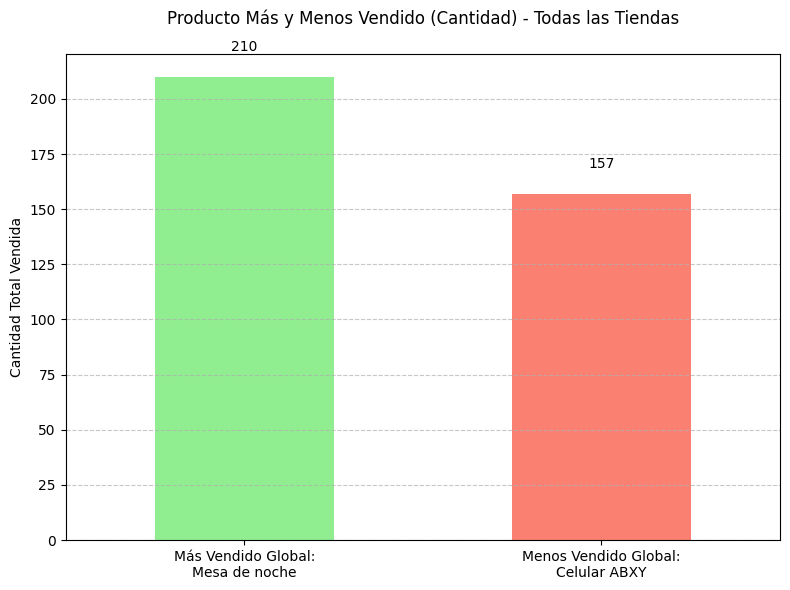

In [45]:
# --- 5. Producto más vendido y menos vendido en todas las tiendas (Gráfico) ---
print("\n--- 5. Producto Más y Menos Vendido (Cantidad) - Todas las Tiendas ---")
conteo_productos_total = df[col_producto].value_counts()

if not conteo_productos_total.empty:
    mas_vendido_total_prod = conteo_productos_total.index[0]
    mas_vendido_total_cant = conteo_productos_total.iloc[0]

    if len(conteo_productos_total) > 1:
        menos_vendido_total_prod = conteo_productos_total.index[-1]
        menos_vendido_total_cant = conteo_productos_total.iloc[-1]
    else:
        menos_vendido_total_prod = mas_vendido_total_prod
        menos_vendido_total_cant = mas_vendido_total_cant


    print(f"Global - Más vendido: {mas_vendido_total_prod} (Cantidad: {mas_vendido_total_cant})")
    print(f"Global - Menos vendido: {menos_vendido_total_prod} (Cantidad: {menos_vendido_total_cant})")

    if mas_vendido_total_prod == menos_vendido_total_prod and mas_vendido_total_cant == menos_vendido_total_cant :
        productos_total_plot = pd.Series([mas_vendido_total_cant], index=[mas_vendido_total_prod])
        colores_prod_total = ['skyblue']
    else:
        productos_total_plot = pd.Series(
            [mas_vendido_total_cant, menos_vendido_total_cant],
            index=[f"Más Vendido Global:\n{mas_vendido_total_prod}", f"Menos Vendido Global:\n{menos_vendido_total_prod}"]
        )
        colores_prod_total = ['lightgreen', 'salmon']


    plt.figure(figsize=(8, 6))
    bars_prod_total = productos_total_plot.plot(kind='bar', color=colores_prod_total)
    plt.title('Producto Más y Menos Vendido (Cantidad) - Todas las Tiendas\n')
    plt.ylabel('Cantidad Total Vendida')
    plt.xticks(rotation=0)
    for i, v in enumerate(productos_total_plot):
        plt.text(i, v + 0.05 * productos_total_plot.max(), str(v), ha='center', va='bottom')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos de productos para analizar el más/menos vendido global.")


--- 4. Producto Más y Menos Vendido (Cantidad) por Tienda ---
Tienda 1:
  Más vendido: Microondas (Cantidad: 60)
  Menos vendido: Celular ABXY (Cantidad: 33)


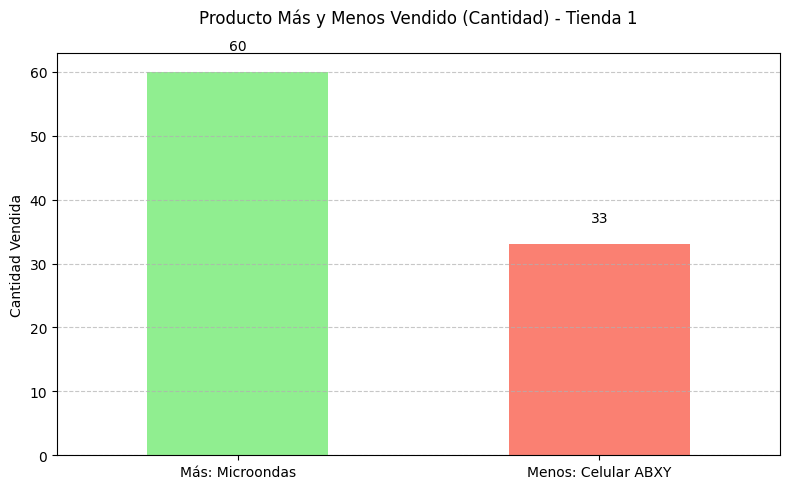

Tienda 2:
  Más vendido: Iniciando en programación (Cantidad: 65)
  Menos vendido: Juego de mesa (Cantidad: 32)


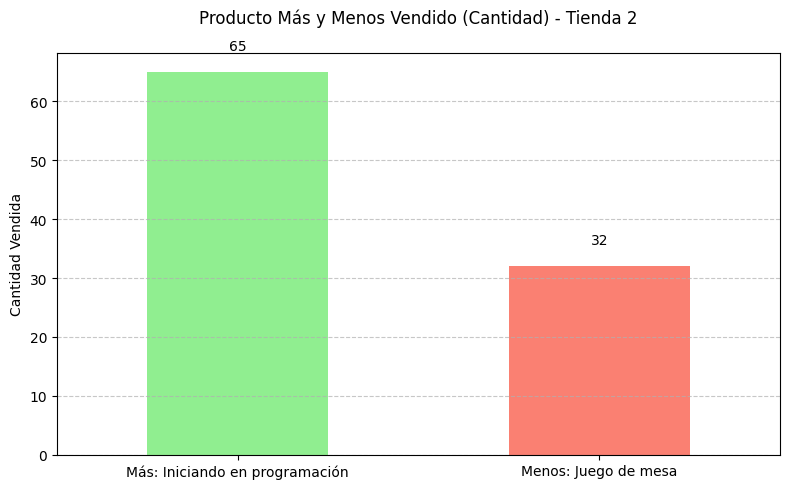

Tienda 3:
  Más vendido: Kit de bancas (Cantidad: 57)
  Menos vendido: Bloques de construcción (Cantidad: 35)


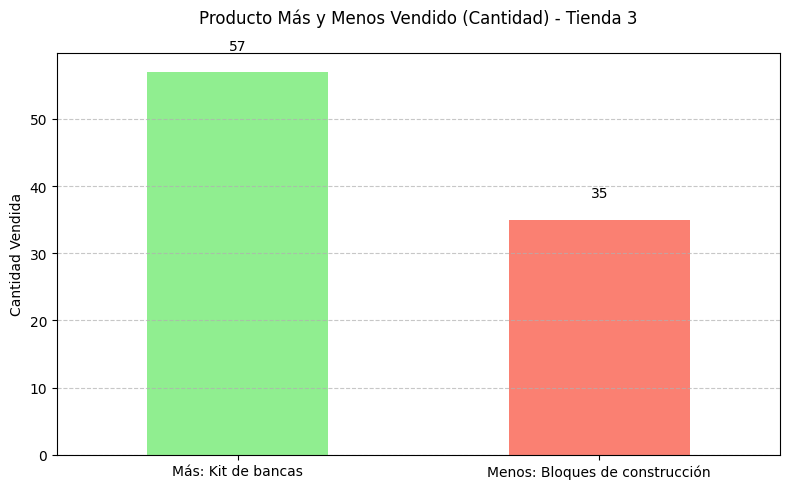

Tienda 4:
  Más vendido: Cama box (Cantidad: 62)
  Menos vendido: Guitarra eléctrica (Cantidad: 33)


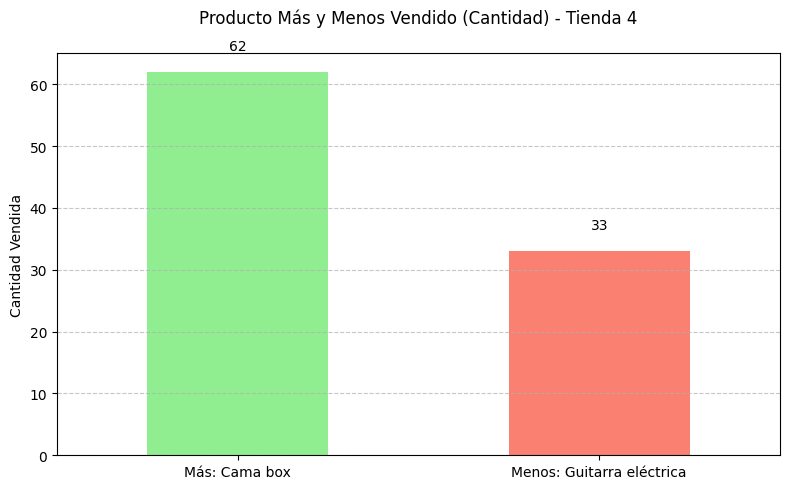

In [47]:
# --- 4. Producto más vendido y menos vendido por tienda (Gráfico) ---
# Asumimos "vendido" en términos de cantidad (frecuencia)
print("\n--- 4. Producto Más y Menos Vendido (Cantidad) por Tienda ---")
tiendas_unicas = df[col_tienda_id].unique()
for tienda in sorted(tiendas_unicas):
    df_tienda_actual = df[df[col_tienda_id] == tienda]
    if df_tienda_actual.empty:
        print(f"Tienda {tienda}: Sin datos de productos.")
        continue

    conteo_productos_tienda = df_tienda_actual[col_producto].value_counts()

    if conteo_productos_tienda.empty:
        print(f"Tienda {tienda}: Sin datos de conteo de productos.")
        continue

    mas_vendido_prod = conteo_productos_tienda.index[0]
    mas_vendido_cant = conteo_productos_tienda.iloc[0]

    # Para el menos vendido, nos aseguramos que no sea el mismo si solo hay un tipo de producto
    if len(conteo_productos_tienda) > 1:
        menos_vendido_prod = conteo_productos_tienda.index[-1]
        menos_vendido_cant = conteo_productos_tienda.iloc[-1]
    else: # Solo un tipo de producto, es el más y el menos vendido
        menos_vendido_prod = mas_vendido_prod
        menos_vendido_cant = mas_vendido_cant

    print(f"Tienda {tienda}:")
    print(f"  Más vendido: {mas_vendido_prod} (Cantidad: {mas_vendido_cant})")
    print(f"  Menos vendido: {menos_vendido_prod} (Cantidad: {menos_vendido_cant})")

    # Gráfico para esta tienda
    if mas_vendido_prod == menos_vendido_prod and mas_vendido_cant == menos_vendido_cant : # Solo un producto o todos vendidos la misma cantidad
        productos_plot = pd.Series([mas_vendido_cant], index=[mas_vendido_prod])
        colores_prod_tienda = ['skyblue']
    else:
        productos_plot = pd.Series([mas_vendido_cant, menos_vendido_cant], index=[f"Más: {mas_vendido_prod}", f"Menos: {menos_vendido_prod}"])
        colores_prod_tienda = ['lightgreen', 'salmon']


    plt.figure(figsize=(8, 5))
    bars_prod_tienda = productos_plot.plot(kind='bar', color=colores_prod_tienda)
    plt.title(f'Producto Más y Menos Vendido (Cantidad) - Tienda {tienda}\n')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=0)
    for i, v in enumerate(productos_plot):
        plt.text(i, v + 0.05 * productos_plot.max() , str(v), ha='center', va='bottom')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda


--- 6. Cantidad de Envíos por Tienda ---
Tienda 1: $26,018.61
Tienda 2: $25,216.24
Tienda 3: $24,805.68
Tienda 4: $23,459.46


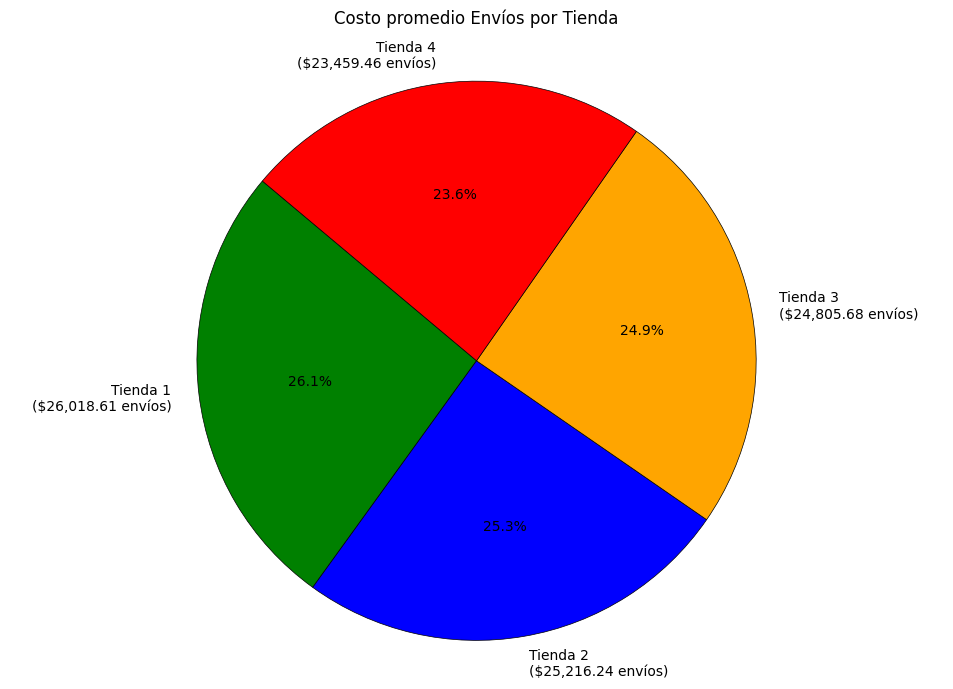


--- ANÁLISIS COMPLETADO ---


In [59]:
# --- 6. Cantidad de envíos por tienda (Gráfico de Torta) ---
print("\n--- 6. Cantidad de Envíos por Tienda ---")
# Asumimos que 'Envíos' es una columna numérica que indica la cantidad de envíos por transacción,
# o un booleano/indicador (0 o 1) que se puede sumar.
# Si cada fila es una venta y todas se envían, y 'Envíos' no existe como tal,
# podrías hacer df.groupby(col_tienda_id).size()
try:
    # Intentar convertir a numérico por si acaso es string, errores a NaN y luego rellenar con 0
    df[col_envios] = pd.to_numeric(df[col_envios], errors='coerce').fillna(0)
    costo_envios_promedio_tienda = df.groupby(col_tienda_id)[col_envios].mean().sort_values(ascending=False)
    for tienda, total in costo_envios_promedio_tienda.items():
        print(f"Tienda {tienda}: {moneda_simbolo}{total:,.2f}")
    #print(costo_envios_promedio_tienda.round(2))

    if not costo_envios_promedio_tienda.empty and costo_envios_promedio_tienda.sum() > 0: # Solo graficar si hay envíos
        plt.figure(figsize=(10, 7))
        # Usar los mismos colores que para las ventas, si hay suficientes tiendas
        colores_pie_envios = colores_graficos[:len(envios_por_tienda)] if len(envios_por_tienda) <= len(colores_graficos) else None

        plt.pie(costo_envios_promedio_tienda,
                labels=[f"Tienda {idx}\n({moneda_simbolo}{val:,.2f} envíos)" for idx, val in costo_envios_promedio_tienda.items()],
                autopct='%1.1f%%', startangle=140,
                colors=colores_pie_envios,
                wedgeprops={"edgecolor":"black", 'linewidth': 0.5})
        plt.title('Costo promedio Envíos por Tienda\n')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
    elif costo_envios_promedio_tienda.sum() == 0:
        print("No se registraron envíos o la columna 'Envíos' no contiene datos válidos para sumar.")
    else:
        print("No hay datos suficientes para graficar envíos por tienda.")
except Exception as e:
    print(f"Error al procesar la columna '{col_envios}': {e}")
    print("Asegúrate de que la columna 'Envíos' sea numérica o pueda convertirse a numérica.")


print("\n--- ANÁLISIS COMPLETADO ---")